# 02 - Transistors Model for not uniform wafer (variant KP property)

Definicion de variables para calcular la el Kp que varia sobre la oblea

In [2]:
from IPython.core.display import Image, display
display(Image(url='images/TipicalValuesLongChannel.png'))

In [3]:
%matplotlib inline
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pylab as plb
def matrix(m_length,m_width):
    "Return matrix with no homogeneus resitivity"
    m = np.zeros((m_length,m_width))
    return m
Material_length=963e-6
scmos_process = 3.e-6
wafer_thickness = 0.05e-6
KP_n_base = 120e-6
KP_p_base = 40e-6
size_m = Material_length/scmos_process
delta_KP=0.05e-6
plt.style.use('ggplot')

Matriz de Trasconductancia ideal KP_n_Ideal

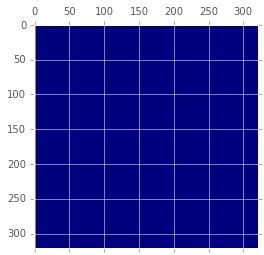

In [4]:
KP_n_Ideal = matrix(int(size_m),int(size_m))
for i in range(0,int(math.sqrt(KP_n_Ideal.size))):
    for j in range(0,int(math.sqrt(KP_n_Ideal.size))):
        KP_n_Ideal[i][j]= KP_n_base
        
plt.matshow(KP_n_Ideal)
plt.show()

Matriz de Trasconductancia ideal KP_p_Ideal

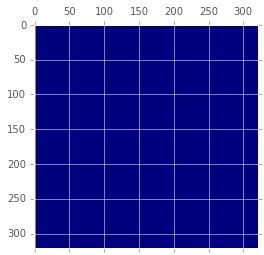

In [5]:
KP_p_Ideal = matrix(int(size_m),int(size_m))
for i in range(0,int(math.sqrt(KP_p_Ideal.size))):
    for j in range(0,int(math.sqrt(KP_p_Ideal.size))):
        KP_p_Ideal[i][j]= KP_p_base
        
plt.matshow(KP_p_Ideal)
plt.show()

OPCION 1 Creacion de las matrices del material con variaciones en Kp_n y Kp_p a partir de la esquina

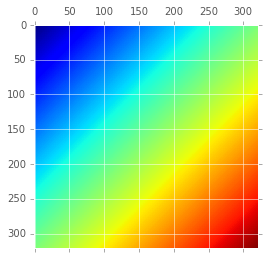

In [6]:
Kp_n = matrix(int(size_m),int(size_m))
def corner_kp_n():
    for i in range(0,int(math.sqrt(Kp_n.size))):
        for j in range(0,int(math.sqrt(Kp_n.size))):
            Kp_n[i][j]= KP_n_base+(i+j)*delta_KP
corner_kp_n()
plt.matshow(Kp_n)
plt.show()

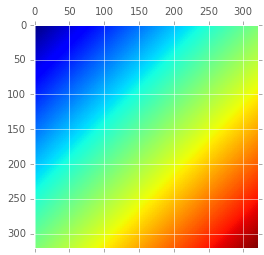

In [7]:
Kp_p = matrix(int(size_m),int(size_m))
def corner_kp_p():
    for i in range(0,int(math.sqrt(Kp_p.size))):
        for j in range(0,int(math.sqrt(Kp_p.size))):
            Kp_p[i][j]= KP_p_base+(i+j)*delta_KP
corner_kp_p()
plt.matshow(Kp_p)
plt.show()

OPCION 2 Creacion de las matrices del material con variaciones en Kp_n y Kp_p del centro hacia afuera

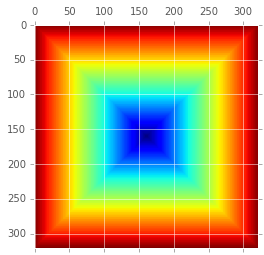

In [8]:
Kp_n = matrix(int(size_m),int(size_m))
def centroid_KP_n(center,i,j):
    "Return a value of KP_n for a single shape"
    difJ=abs(center-j)
    difI=abs(center-i)
    xy=0
    if difJ > difI:
        xy=difJ
    else:
        xy=difI
    Kpn= KP_n_base+(xy)*delta_KP
        
    return Kpn
def center_kp_n():
    for i in range(0,int(math.sqrt(Kp_n.size))):
        for j in range(0,int(math.sqrt(Kp_n.size))):
            Kp_n[i][j]= centroid_KP_n((int(math.sqrt(Kp_n.size))-1)/2,i,j)
center_kp_n()
plt.matshow(Kp_n)
plt.show()

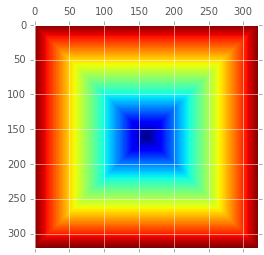

In [9]:
Kp_p = matrix(int(size_m),int(size_m))

def centroid_KP_p(center,i,j):
    "Return a value of KP_n for a single shape"
    difJ=abs(center-j)
    difI=abs(center-i)
    xy=0
    if difJ > difI:
        xy=difJ
    else:
        xy=difI
    Kpp= KP_p_base+(xy)*delta_KP
        
    return Kpp
def center_kp_p():
    for i in range(0,int(math.sqrt(Kp_p.size))):
        for j in range(0,int(math.sqrt(Kp_p.size))):
            Kp_p[i][j]= centroid_KP_p((int(math.sqrt(Kp_p.size))-1)/2,i,j)
center_kp_p()
plt.matshow(Kp_p)
plt.show()

Inicializando la matriz de dibujo en el material

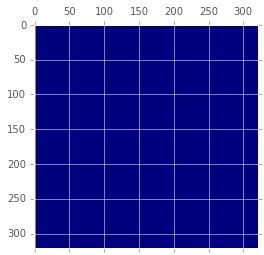

In [10]:
paint_matrix = matrix(int(size_m),int(size_m))
plt.matshow(paint_matrix)
plt.show()

Ingrese las dimensiones LxW de los transistores

In [11]:
display(Image(url='images/WLCMOS.png'))

In [20]:
W_base=2
WTA=60
WTB=60
WTC=60
WTD=60
lenght_active_si_transistor = 6
L=2

In [21]:
display(Image(url='images/Transistor.png'))
print("W_base de 8 unidades")

W_base de 8 unidades


OPCION 1 de Dise침o de 4 transistores con centroide comun, para usar 2 de esos en la simulacion del espejo de corriente

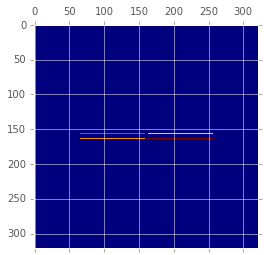

In [22]:
paint_matrix = matrix(int(size_m),int(size_m))
M_center=int((int(math.sqrt(paint_matrix.size))-1)/2)

TA = matrix(W_base,int((WTA/W_base+1)*(lenght_active_si_transistor/2)))
for i in range(M_center-2-TA.shape[0],M_center-2):
    for j in range(M_center-2-TA.shape[1],M_center-2):
        paint_matrix[i][j]=1
        
TB = matrix(W_base,int((WTB/W_base+1)*(lenght_active_si_transistor/2)))
for i in range(M_center-2-TB.shape[0],M_center-2):
    for j in range(M_center+3,TB.shape[1]+M_center+3):
        paint_matrix[i][j]=2
        
TC = matrix(W_base,int((WTC/W_base+1)*(lenght_active_si_transistor/2)))
for i in range(M_center+3,TC.shape[0]+M_center+3):
    for j in range(M_center-2-TC.shape[1],M_center-2):
        paint_matrix[i][j]=3
        
TD = matrix(W_base,int((WTD/W_base+1)*(lenght_active_si_transistor/2)))
for i in range(M_center+3,TD.shape[0]+M_center+3):
    for j in range(M_center+3,TD.shape[1]+M_center+3):
        paint_matrix[i][j]=4
#paint_matrix[3:6,7]=RA
#paint_matrix[3:6,9]=RC
plt.matshow(paint_matrix)
plt.show()

Calculo del valor promedio de KP para cada transistor

In [23]:
def prom_KP_n_for_transistor(transistor_num):
    "Return a prom value of KP_n for a single transistor in the wafer"
    Kpn_sum=0
    Kpn_found=0
    for i in range(0,int(math.sqrt(paint_matrix.size))):
        for j in range(0,int(math.sqrt(paint_matrix.size))):
            if paint_matrix[i][j] == transistor_num:
                Kpn_sum += Kp_n[i][j]
                Kpn_found += 1
                
    Kpn_prom=Kpn_sum/(Kpn_found)

        
    return Kpn_prom
def prom_KP_p_for_transistor(transistor_num):
    "Return a prom value of KP_p for a single transistor in the wafer"
    Kpp_sum=0
    Kpp_found=0
    for i in range(0,int(math.sqrt(paint_matrix.size))):
        for j in range(0,int(math.sqrt(paint_matrix.size))):
            if paint_matrix[i][j] == transistor_num:
                Kpp_sum += Kp_p[i][j]
                Kpp_found += 1
                
    Kpp_prom=Kpp_sum/(Kpp_found)

        
    return Kpp_prom

Con variacion de variacion a partir de la esquina de Kp en la oblea

In [24]:
corner_kp_n()
Kpn_T1=prom_KP_n_for_transistor(1)
Kpn_T2=prom_KP_n_for_transistor(2)
Kpn_T3=prom_KP_n_for_transistor(3)
Kpn_T4=prom_KP_n_for_transistor(4)


print("Kp_n Transistor 1: "+str(Kpn_T1))
print("Kp_n Transistor 2: "+str(Kpn_T2))
print("Kp_n Transistor 3: "+str(Kpn_T3))
print("Kp_n Transistor 4: "+str(Kpn_T4))

corner_kp_p()
Kpp_T1=prom_KP_p_for_transistor(1)
Kpp_T2=prom_KP_p_for_transistor(2)
Kpp_T3=prom_KP_p_for_transistor(3)
Kpp_T4=prom_KP_p_for_transistor(4)


print("Kp_p Transistor 1: "+str(Kpp_T1))
print("Kp_p Transistor 2: "+str(Kpp_T2))
print("Kp_p Transistor 3: "+str(Kpp_T3))
print("Kp_p Transistor 4: "+str(Kpp_T4))

Kp_n Transistor 1: 0.000133375
Kp_n Transistor 2: 0.000138275
Kp_n Transistor 3: 0.000133725
Kp_n Transistor 4: 0.000138625
Kp_p Transistor 1: 5.3375e-05
Kp_p Transistor 2: 5.8275e-05
Kp_p Transistor 3: 5.3725e-05
Kp_p Transistor 4: 5.8625e-05


Con variacion del centro hacia afuera de Kp en la oblea

In [25]:
center_kp_n()
Kpn_T1=prom_KP_n_for_transistor(1)
Kpn_T2=prom_KP_n_for_transistor(2)
Kpn_T3=prom_KP_n_for_transistor(3)
Kpn_T4=prom_KP_n_for_transistor(4)


print("Kp_n Transistor 1: "+str(Kpn_T1))
print("Kp_n Transistor 2: "+str(Kpn_T2))
print("Kp_n Transistor 3: "+str(Kpn_T3))
print("Kp_n Transistor 4: "+str(Kpn_T4))


center_kp_p()
Kpp_T1=prom_KP_p_for_transistor(1)
Kpp_T2=prom_KP_p_for_transistor(2)
Kpp_T3=prom_KP_p_for_transistor(3)
Kpp_T4=prom_KP_p_for_transistor(4)


print("Kp_p Transistor 1: "+str(Kpp_T1))
print("Kp_p Transistor 2: "+str(Kpp_T2))
print("Kp_p Transistor 3: "+str(Kpp_T3))
print("Kp_p Transistor 4: "+str(Kpp_T4))

Kp_n Transistor 1: 0.000122450268817
Kp_n Transistor 2: 0.000122450268817
Kp_n Transistor 3: 0.000122450268817
Kp_n Transistor 4: 0.000122450268817
Kp_p Transistor 1: 4.24502688172e-05
Kp_p Transistor 2: 4.24502688172e-05
Kp_p Transistor 3: 4.24502688172e-05
Kp_p Transistor 4: 4.24502688172e-05


# NGSPICE Simulations - 01 Current Mirror

Funcion para editar el archivo de simulacion del espejo NMOS 'espejoNmosPythonFile.cir'

In [46]:
import sys
import fileinput
def modificar_cir_Espejo_NMOS(W,L,Kp_T1,Kp_T2):
    num=234e-6
    n_found=0
    text="* Simulaci칩n Circuito Espejo de Corriente con Ncmos, valores reales de Kp_n y Vt"+"\n"+ \
    "* Universidad Nacional de Colombia 2016"+"\n"+ \
    "* CMOS Anal칩gico"+"\n"+ \
    "* Grupo Jorge Garz칩n, Esteban Iafrancesco A"+"\n"+ \
    "\n"+\
    "VDD VDD 0 DC 10 AC 0"+"\n"+\
    "V2 VR 0 DC 10 AC 0"+"\n"+\
    "VRD RDN VR DC 0 AC 0"+"\n"+\
    "RD RDN DRAIN 1000"+"\n"+\
    "RP VDD GATE 2000"+"\n"+\
    "M1 DRAIN GATE 0 0 nmosideal W="+str(W)+" L="+str(L)+"\n"+\
    "M2 GATE GATE 0 0 nmosideal W="+str(W)+" L="+str(L)+"\n"+\
    "\n"+\
    "VRD2 RDN2 VR DC 0 AC 0"+"\n"+\
    "RD2 RDN2 DRAIN2 1000"+"\n"+\
    "RP2 VDD GATE2 2000"+"\n"+\
    "M3 DRAIN2 GATE2 0 0 nmos1 W="+str(W)+" L="+str(L)+"\n"+\
    "M4 GATE2 GATE2 0 0 nmos2 W="+str(W)+" L="+str(L)+"\n"+\
    "\n"+\
    ".model nmosideal nmos LEVEL=1 Vto=0.8 KP=120u LAMBDA=0.01 U0=650"+"\n"+\
    ".model nmos1 nmos LEVEL=1 Vto=0.8 KP="+str(Kp_T1)+" LAMBDA=0.01 U0=650"+"\n"+\
    ".model nmos2 nmos LEVEL=1 Vto=0.8 KP="+str(Kp_T2)+" LAMBDA=0.01 U0=650"+"\n"+\
    "\n"+\
    ".control"+"\n"+\
    "set color0 =white"+"\n"+\
    "set color1=black"+"\n"+\
    "op"+"\n"+\
    "show all"+"\n"+\
    "dc vdd 0.7 12 0.01"+"\n"+\
    "plot i(vrd) i(vrd2)"+"\n"+\
    ".endc"+"\n"
    for i, line in enumerate(fileinput.input('../spice-simulations/espejoNmosPythonFile.cir', inplace=1)):
        if i == 1: sys.stdout.write(text) # replace 'sit' and write
    fileinput.close()

Simulacion con variacion desde la esquina de Kp_n en la oblea y centroide comun entre 2 transistores para formar el espejo de corriente

In [47]:
corner_kp_n()
Kpn_T1=prom_KP_n_for_transistor(1)
Kpn_T2=prom_KP_n_for_transistor(2)
Kpn_T3=prom_KP_n_for_transistor(3)
Kpn_T4=prom_KP_n_for_transistor(4)

#modificar_cir_Espejo_NMOS(WTA,L,Kpn_T1,Kpn_T2)

In [50]:
display(Image(url='images/corner_TA_TB.png'))
print("W_base de 8 unidades")

W_base de 8 unidades


In [48]:
#modificar_cir_Espejo_NMOS(WTA,L,Kpn_T1,Kpn_T3)

In [51]:
display(Image(url='images/corner_TA_TC.png'))
print("W_base de 8 unidades")

W_base de 8 unidades


In [49]:
#modificar_cir_Espejo_NMOS(WTA,L,Kpn_T2,Kpn_T3)

In [52]:
display(Image(url='images/corner_TB_TC.png'))
print("W_base de 8 unidades")

W_base de 8 unidades
